In [9]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache

### Load frames

In [3]:
isttc_results_folder_path = 'Q:\\Personal\\Irina\\projects\\isttc\\results\\allen_mice\\'

In [4]:
sttc_df = pd.read_pickle(isttc_results_folder_path + 'not_binned_sttc\\' + 'tau_bsl_sua_sttc_50ms_20lags_df.pkl')
pearson_df = pd.read_pickle(isttc_results_folder_path + 'binned_pearson\\' + 'tau_bsl_sua_pearson_50ms_20lags_df.pkl')

In [ ]:
sttc_df.head()

In [5]:
sttc_df_subset = sttc_df[['unit_id', 'acf_decay_1_4', 'r_squared', 'tau', 'tau_ms', 'acf_fit_failed']].copy()
pearson_df_subset = pearson_df[['unit_id', 'acf_decay_1_4', 'r_squared', 'tau', 'tau_ms', 'acf_fit_failed']].copy()

In [6]:
df_merged = pd.merge(sttc_df_subset, pearson_df_subset, on='unit_id', how='inner', suffixes=('_sttc', '_pear'))
df_merged

,unit_id,acf_decay_1_4_sttc,r_squared_sttc,tau_sttc,tau_ms_sttc,acf_fit_failed_sttc,acf_decay_1_4_pear,r_squared_pear,tau_pear,tau_ms_pear,acf_fit_failed_pear
0,950911624,False,0.414461,0.073716,3.685779,False,False,0.042055,0.076232,3.811619,False
1,950911641,False,0.323411,0.073929,3.696451,False,False,0.288311,0.074007,3.700342,False
2,950911657,False,0.964727,0.238859,11.942959,False,False,0.961194,0.067684,3.384206,False
3,950911686,False,0.252137,0.073141,3.657060,False,False,0.817335,0.692097,34.604858,False
4,950911696,True,0.982544,7.783305,389.165271,False,True,0.985544,4.950740,247.537003,False
...,...,...,...,...,...,...,...,...,...,...,...
837,950950928,True,0.994573,6.547107,327.355365,False,True,0.986981,5.476840,273.842006,False
838,950950976,True,0.974740,0.639723,31.986133,False,True,0.931892,1.513629,75.681453,False
839,950951230,False,0.824164,98.675609,4933.780435,False,False,0.866667,52.415333,2620.766651,False
840,950951241,True,0.872920,1.330909,66.545446,False,True,0.757824,47.604999,2380.249938,False


In [7]:
df_merged['diff'] = df_merged['r_squared_sttc'] - df_merged['r_squared_pear']

### Load Allen stuff

In [10]:
# cache directory path, it determines where downloaded data will be stored
output_dir = '/ecephys_cache_dir/'
manifest_path = os.path.join(output_dir, "manifest.json")
cache = EcephysProjectCache.from_warehouse(manifest=manifest_path)
print(cache.get_all_session_types())

# functional connecivity dataset contains 30 min spontaneous activity block
sessions = cache.get_session_table()
print('len sessions: {}'.format(len(sessions)))

brain_observatory_type_sessions = sessions[sessions["session_type"] == "functional_connectivity"]
print('len brain_observatory_type_sessions = functional_connectivity: {}'.format(len(brain_observatory_type_sessions)))
print(brain_observatory_type_sessions.keys())

brain_observatory_type_sessions.tail(3)

['brain_observatory_1.1', 'functional_connectivity']
len sessions: 58
len brain_observatory_type_sessions = functional_connectivity: 26
Index(['published_at', 'specimen_id', 'session_type', 'age_in_days', 'sex',
       'full_genotype', 'unit_count', 'channel_count', 'probe_count',
       'ecephys_structure_acronyms'],
      dtype='object')


,published_at,specimen_id,session_type,age_in_days,sex,full_genotype,unit_count,channel_count,probe_count,ecephys_structure_acronyms
id,,,,,,,,,,
839557629,2019-10-03T00:00:00Z,821469666,functional_connectivity,115.0,M,Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,450,1853,5,"[APN, NOT, MB, DG, CA1, VISam, nan, VISpm, LGd..."
840012044,2019-10-03T00:00:00Z,820866121,functional_connectivity,116.0,M,Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,758,2298,6,"[APN, DG, CA1, VISam, nan, LP, VISpm, VISp, LG..."
847657808,2019-10-03T00:00:00Z,827809884,functional_connectivity,126.0,F,wt/wt,874,2298,6,"[APN, NOT, DG, HPF, ProS, CA1, VISam, nan, MB,..."


In [11]:
session_id_ = brain_observatory_type_sessions.index.values[0]
print('processing session {}'.format(session_id_))

brain_observatory_type_sessions.loc[session_id_,:]

processing session 766640955


published_at                                               2019-10-03T00:00:00Z
specimen_id                                                           744912849
session_type                                            functional_connectivity
age_in_days                                                               133.0
sex                                                                           M
full_genotype                                                             wt/wt
unit_count                                                                  842
channel_count                                                              2233
probe_count                                                                   6
ecephys_structure_acronyms    [MB, APN, NOT, DG, CA1, VISam, nan, PF, TH, LP...
Name: 766640955, dtype: object

In [12]:
session_ = cache.get_session_data(session_id_)
units = session_.units
print(len(units))
print(units.keys())

C:\Users\ipochino\.conda\envs\allensdk2\Lib\site-packages\hdmf\utils.py:668: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.1.3 because version 1.8.0 is already loaded.
  return func(args[0], **pargs)
C:\Users\ipochino\.conda\envs\allensdk2\Lib\site-packages\hdmf\utils.py:668: UserWarning: Ignoring cached namespace 'core' version 2.2.2 because version 2.7.0 is already loaded.
  return func(args[0], **pargs)
C:\Users\ipochino\.conda\envs\allensdk2\Lib\site-packages\hdmf\utils.py:668: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.1.3 because version 1.8.0 is already loaded.
  return func(args[0], **pargs)
C:\Users\ipochino\.conda\envs\allensdk2\Lib\site-packages\hdmf\utils.py:668: UserWarning: Ignoring cached namespace 'core' version 2.2.2 because version 2.7.0 is already loaded.
  return func(args[0], **pargs)
C:\Users\ipochino\.conda\envs\allensdk2\Lib\site-packages\hdmf\utils.py:668: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.1.3 be

842
Index(['waveform_PT_ratio', 'waveform_amplitude', 'amplitude_cutoff',
       'cluster_id', 'cumulative_drift', 'd_prime', 'firing_rate',
       'isi_violations', 'isolation_distance', 'L_ratio', 'local_index',
       'max_drift', 'nn_hit_rate', 'nn_miss_rate', 'peak_channel_id',
       'presence_ratio', 'waveform_recovery_slope',
       'waveform_repolarization_slope', 'silhouette_score', 'snr',
       'waveform_spread', 'waveform_velocity_above', 'waveform_velocity_below',
       'waveform_duration', 'filtering', 'probe_channel_number',
       'probe_horizontal_position', 'probe_id', 'probe_vertical_position',
       'structure_acronym', 'ecephys_structure_id',
       'ecephys_structure_acronym', 'anterior_posterior_ccf_coordinate',
       'dorsal_ventral_ccf_coordinate', 'left_right_ccf_coordinate',
       'probe_description', 'location', 'probe_sampling_rate',
       'probe_lfp_sampling_rate', 'probe_has_lfp_data'],
      dtype='object')


In [13]:
units.head(3)

,waveform_PT_ratio,waveform_amplitude,amplitude_cutoff,cluster_id,cumulative_drift,d_prime,firing_rate,isi_violations,isolation_distance,L_ratio,...,ecephys_structure_id,ecephys_structure_acronym,anterior_posterior_ccf_coordinate,dorsal_ventral_ccf_coordinate,left_right_ccf_coordinate,probe_description,location,probe_sampling_rate,probe_lfp_sampling_rate,probe_has_lfp_data
unit_id,,,,,,,,,,,,,,,,,,,,,
950911624,0.451580,156.94965,0.000344,2,127.43,5.128493,8.905862,0.026995,105.642029,0.000127,...,313.0,MB,8121.0,3321.0,6562.0,probeA,See electrode locations,29999.968499,1249.998687,True
950911641,0.794832,144.38775,0.000609,3,318.83,5.588427,9.531874,0.000842,111.293247,0.000238,...,313.0,MB,8119.0,3312.0,6563.0,probeA,See electrode locations,29999.968499,1249.998687,True
950911686,0.263552,132.55983,0.045403,6,271.37,3.977572,19.019987,0.006341,103.608231,0.003470,...,313.0,MB,8111.0,3287.0,6567.0,probeA,See electrode locations,29999.968499,1249.998687,True


In [42]:
units_df_subset = units[['ecephys_structure_acronym', 'structure_acronym']].copy()
units_df_subset.reset_index(inplace=True)
units_df_subset

,unit_id,ecephys_structure_acronym,structure_acronym
0,950911624,MB,MB
1,950911641,MB,MB
2,950911686,MB,MB
3,950911657,MB,MB
4,950911696,MB,MB
...,...,...,...
837,950950813,VISrl,VISrl
838,950950915,VISrl,VISrl
839,950950901,VISrl,VISrl
840,950950928,VISrl,VISrl


In [37]:
units_taus_merged = pd.merge(units_df_subset, pearson_df_subset, on='unit_id', how='inner')
units_taus_merged

,unit_id,ecephys_structure_acronym,acf_decay_1_4,r_squared,tau,tau_ms,acf_fit_failed
0,950911624,MB,False,0.042055,0.076232,3.811619,False
1,950911641,MB,False,0.288311,0.074007,3.700342,False
2,950911686,MB,False,0.817335,0.692097,34.604858,False
3,950911657,MB,False,0.961194,0.067684,3.384206,False
4,950911696,MB,True,0.985544,4.950740,247.537003,False
...,...,...,...,...,...,...,...
837,950950813,VISrl,True,0.977302,11.819414,590.970715,False
838,950950915,VISrl,True,0.982681,1.966658,98.332877,False
839,950950901,VISrl,True,0.990392,7.241437,362.071834,False
840,950950928,VISrl,True,0.986981,5.476840,273.842006,False


In [38]:
units_taus_merged_filtered = units_taus_merged.query('tau_ms > 0 and tau_ms <= 1000 and r_squared >= 0.8').copy()
print(len(units_taus_merged_filtered))

538


In [39]:
taus_med = units_taus_merged_filtered.groupby(by='ecephys_structure_acronym', as_index=False).median()
taus_med.sort_values(by='tau_ms', inplace=True)
taus_med

,ecephys_structure_acronym,unit_id,acf_decay_1_4,r_squared,tau,tau_ms,acf_fit_failed
2,CA3,950940963.0,0.5,0.927674,1.271884,63.594224,0.0
1,CA1,950928469.5,1.0,0.914477,1.624066,81.203309,0.0
7,TH,950938431.0,1.0,0.972526,1.865222,93.261109,0.0
6,MB,950916288.0,1.0,0.971120,2.116429,105.821438,0.0
3,DG,950932759.0,1.0,0.937972,2.119826,105.991280,0.0
14,VPM,950937844.5,1.0,0.968808,2.313095,115.654729,0.0
9,VISam,950914243.0,1.0,0.940466,2.926327,146.316336,0.0
0,APN,950912332.0,0.0,0.941546,3.783860,189.192986,0.0
12,VISp,950930205.5,1.0,0.953136,4.125210,206.260494,0.0
4,LGd,950939590.0,1.0,0.966012,4.411099,220.554945,0.0


In [40]:
taus_mean = units_taus_merged_filtered.groupby(by='ecephys_structure_acronym', as_index=False).mean()
taus_mean.sort_values(by='tau_ms', inplace=True)
taus_mean

,ecephys_structure_acronym,unit_id,acf_decay_1_4,r_squared,tau,tau_ms,acf_fit_failed
7,TH,9.509364e+08,1.000000,0.971010,1.863855,93.192762,0.0
2,CA3,9.509423e+08,0.500000,0.911937,2.029976,101.498796,0.0
14,VPM,9.509385e+08,1.000000,0.959940,2.717544,135.877192,0.0
6,MB,9.509193e+08,0.769231,0.946573,2.806585,140.329268,0.0
1,CA1,9.509297e+08,0.627451,0.909616,2.919915,145.995774,0.0
9,VISam,9.509143e+08,0.575758,0.937328,4.194365,209.718244,0.0
0,APN,9.509230e+08,0.483871,0.931015,4.384264,219.213203,0.0
3,DG,9.509349e+08,0.615385,0.929471,4.414756,220.737778,0.0
4,LGd,9.509398e+08,0.861538,0.953283,5.103923,255.196129,0.0
10,VISl,9.509358e+08,0.611111,0.964081,5.674547,283.727374,0.0


### Plots

C:\Users\ipochino\AppData\Local\Temp\ipykernel_2668\1075917502.py:7: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(ax=axes[0], x = 'ecephys_structure_acronym', y='tau_ms',


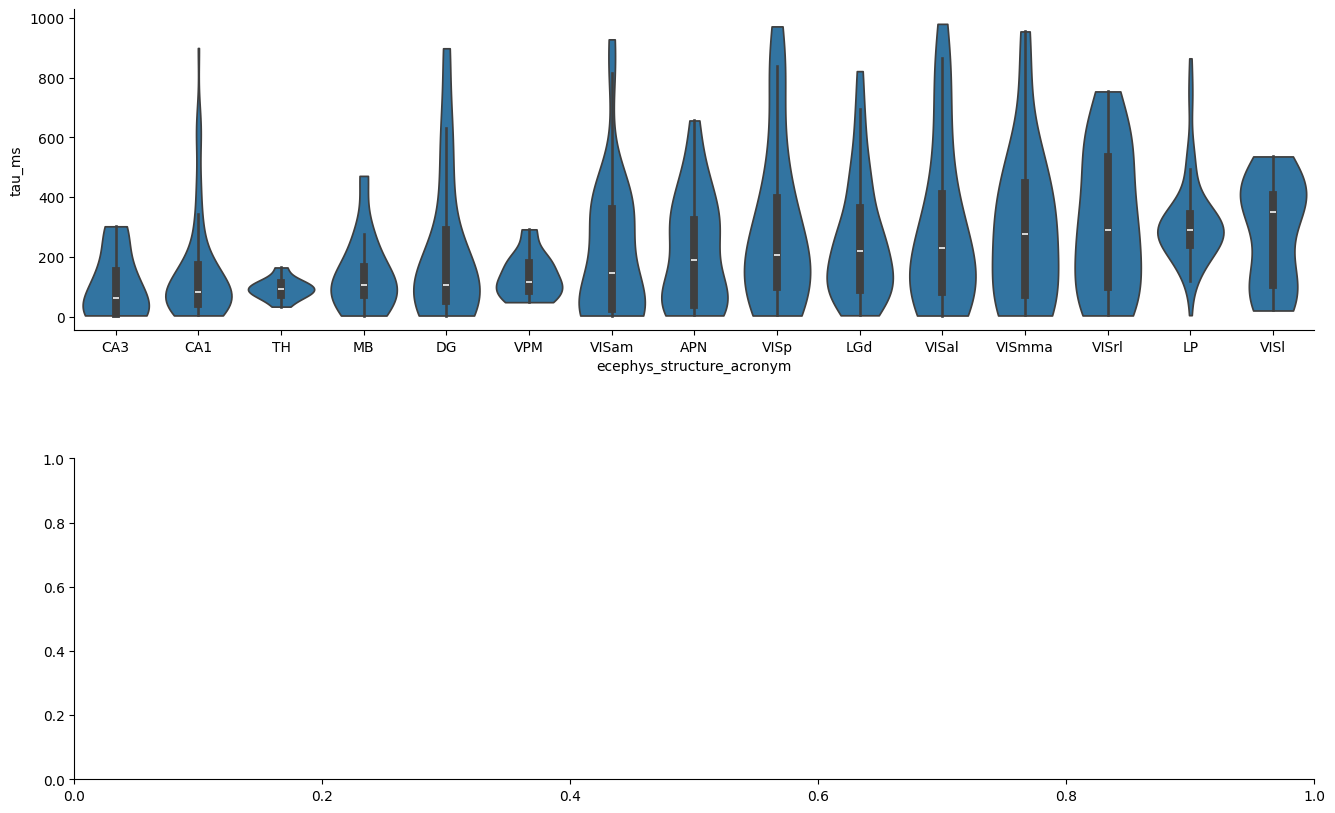

In [41]:
# n_sttc_better = len(df_merged.query('diff > 0'))
# n_sttc_better_perc = n_sttc_better / len(df_merged) * 100

fig, axes = plt.subplots(2,1, figsize=(16,10))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

sns.violinplot(ax=axes[0], x = 'ecephys_structure_acronym', y='tau_ms', 
               data=units_taus_merged_filtered, order=taus_med['ecephys_structure_acronym'].values,
                                            cut=0,  scale='width')

# axes[0].set_xlabel('Pearson R-squared')
# axes[0].set_ylabel('STTC R-squared')


sns.despine()

In [ ]:
sns.violinplot(y='tau_ms_sttc', data=df_merged.query('tau_ms_sttc > 0 and tau_ms_sttc <= 1000'))
sns.despine()